In [1]:
import os
import sys
import numpy as np
import time
import json
import random
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from collections import defaultdict
from matplotlib.pyplot import axvline
import math
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
from inspect import signature
from collections import Counter, defaultdict
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
import pickle
import datetime
import seaborn as sns

In [2]:
with open("./feature_map.json", "r") as f:
    features = json.load(f)
id_2_feature = {y:x for x,y in features.items()}

##### With raw scores as input, itegrate out the measure scores in a user specific way.

In [3]:
def get_measure_scores(usrid, usr_type, input_path, output_path, lamda_0 = None):

    # get rid of the first element because, by default, it is set as 0 in DHP.

    if lamda_0:
        f_t = np.load("./%s/f_t/%s_f_t_%s.npy"%(input_path, usrid, lamda_0))[1:]
        f_y = np.load("./%s/f_y/%s_f_y_%s.npy"%(input_path, usrid, lamda_0))[1:]
        _sus_score = np.load("./%s/score/%s_score_%s.npy"%(input_path, usrid, lamda_0))[1:]
    else:
        f_t = np.load("./%s/f_t/%s_f_t.npy"%(input_path, usrid))[1:]
        f_y = np.load("./%s/f_y/%s_f_y.npy"%(input_path, usrid))[1:]
        _sus_score = np.load("./%s/score/%s_score.npy"%(input_path,usrid))[1:]

    if usr_type == "normal":
        _tim_act = np.load("./dataRepo/input/NormalData/time_activity_%s.npy"%usrid)[1:]
        _label_sess = np.load("./dataRepo/input/NormalData/label_sess_%s.npy"%usrid)[1:]
    else:
        _tim_act = np.load("./dataRepo/input/InsiderData/time_activity_%s.npy"%usrid)[1:]
        _label_sess = np.load("./dataRepo/input/InsiderData/label_sess_%s.npy"%usrid)[1:]

    _tim = _tim_act[:, 0].astype(float)
    _act = _tim_act[:, 1].astype(int)
    _label = _label_sess[:,0]
                                                    
    if lamda_0:
        np.save("./%s/f_t/%s_f_t_%s.npy"%(output_path, usrid, lamda_0), f_t)
        np.save("./%s/f_y/%s_f_y_%s.npy"%(output_path, usrid, lamda_0), f_y)
        np.save("./%s/score/%s_score_%s.npy"%(output_path, usrid, lamda_0), _sus_score)
    else:
        np.save("./%s/f_t/%s_f_t.npy"%(output_path, usrid), f_t)
        np.save("./%s/f_y/%s_f_y.npy"%(output_path, usrid), f_y)
        np.save("./%s/score/%s_score.npy"%(output_path, usrid),_sus_score)
        
    np.save("./%s/activity/%s_act.npy"%(output_path,usrid),_act)
    np.save("./%s/time/%s_time.npy"%(output_path, usrid),_tim)
    np.save("./%s/label/%s_act_label.npy"%(output_path, usrid),_label)

##### With raw scores as input, itegrate out the measure scores in a user-\lambda_0 specific way.

In [4]:
def get_measure_scores_2(usrid, usr_type, input_path, output_path, lamda_0 = None):

    # get rid of the first element because, by default, it is set as 0 in DHP.

    f_t = np.load("./%s/f_t/%s_f_t_%s.npy"%(input_path, usrid, lamda_0))[1:]
    f_y = np.load("./%s/f_y/%s_f_y_%s.npy"%(input_path, usrid, lamda_0))[1:]
    _sus_score = np.load("./%s/score/%s_score_%s.npy"%(input_path, usrid, lamda_0))[1:]

    if usr_type == "normal":
        _tim_act = np.load("./dataRepo/input/NormalData/time_activity_%s.npy"%usrid)[1:]
        _label_sess = np.load("./dataRepo/input/NormalData/label_sess_%s.npy"%usrid)[1:]
    else:
        _tim_act = np.load("./dataRepo/input/InsiderData/time_activity_%s.npy"%usrid)[1:]
        _label_sess = np.load("./dataRepo/input/InsiderData/label_sess_%s.npy"%usrid)[1:]

    _tim = _tim_act[:, 0].astype(float)
    _act = _tim_act[:, 1].astype(int)
    _label = _label_sess[:,0]
                                                    
    
    np.save("./%s/f_t/%s_f_t_%s.npy"%(output_path, usrid, lamda_0), f_t)
    np.save("./%s/f_y/%s_f_y_%s.npy"%(output_path, usrid, lamda_0), f_y)
    np.save("./%s/score/%s_score_%s.npy"%(output_path, usrid, lamda_0), _sus_score)
        
    np.save("./%s/activity/%s_act.npy"%(output_path,usrid),_act)
    np.save("./%s/time/%s_time.npy"%(output_path, usrid),_tim)
    np.save("./%s/label/%s_act_label.npy"%(output_path, usrid),_label)

### 1. Measure score preprocessing

In [5]:
input_path = "dmhpOutput"
output_path = "eval_input"

if not os.path.exists("./eval_input/f_t/"):
    os.makedirs("./eval_input/f_t/")

if not os.path.exists("./eval_input/f_y/"):
    os.makedirs("./eval_input/f_y/")
    
if not os.path.exists("./eval_input/score/"):
    os.makedirs("./eval_input/score/")

if not os.path.exists("./eval_input/activity/"):
    os.makedirs("./eval_input/activity/")

if not os.path.exists("./eval_input/time/"):
    os.makedirs("./eval_input/time/")
    
if not os.path.exists("./eval_input/label/"):
    os.makedirs("./eval_input/label/")

for usrid in ['ACM2278', "CDE1846", 'CMP2946', 'MBG3183', 'PLJ1771']:
    get_measure_scores(usrid, "abnormal", input_path, output_path)
    
for usrid in ['AAB0398', 'AAC0610', 'AAC0668', 'AAC3270','AAD2188']:
    get_measure_scores(usrid, "normal", input_path, output_path)

### 2. For Baselines

In [6]:
def decimalTo01(n, bit_num):
    embedding = np.zeros(bit_num)
    embedding[n-1] = 1
    return embedding.tolist()

In [7]:
training_samples = []
testing_samples = []
training_labels = []
testing_labels = []
_activities = []

for usrid in ['ACM2278', 'CDE1846', 'CMP2946', 'MBG3183', 'PLJ1771', 'AAB0398','AAC0610','AAC0668','AAC3270','AAD2188']:

    times = np.load("./eval_input/time/%s_time.npy"%usrid)
    activities = np.load("./eval_input/activity/%s_act.npy"%usrid)
    labels = np.load("./eval_input/label/%s_act_label.npy"%usrid)
    
    _thrld_time = times[int(len(times)/10)]
    _thrld_time = time.strftime("%Y-%m-%d %H:%M:%S",time.localtime(_thrld_time))
    _thrld_time = datetime.datetime.strptime(_thrld_time,"%Y-%m-%d %H:%M:%S")
    
    count = 0
    count1 = 0
    for _time, _act, _label in zip(times, activities, labels):
        
        _activities.append(_act)    
        _time = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(_time))
        _time = datetime.datetime.strptime(_time, "%Y-%m-%d %H:%M:%S")
        
        if _time < _thrld_time:
            training_samples.append(decimalTo01(_time.hour, 24) + decimalTo01(_act, 22))
            training_labels.append(_label)
            count += 1
        else:
            testing_samples.append(decimalTo01(_time.hour, 24) + decimalTo01(_act, 22))
            testing_labels.append(_label)
            count1 += 1
    print(usrid, ": ", _thrld_time, " ", count, count1)
#     input()

ACM2278 :  2010-01-27 11:48:49   3137 28233
CDE1846 :  2010-02-22 15:16:36   3775 33979
CMP2946 :  2010-02-16 15:37:03   6198 55791
MBG3183 :  2010-02-22 14:51:11   4243 38195
PLJ1771 :  2010-01-25 14:28:22   2096 18868
AAB0398 :  2010-02-22 12:15:30   4501 40514
AAC0610 :  2010-02-23 08:04:06   1494 13449
AAC0668 :  2010-02-22 11:40:12   3760 33842
AAC3270 :  2010-02-22 12:23:31   461 4149
AAD2188 :  2010-02-22 11:40:43   461 4150


In [103]:
training_samples = np.array(training_samples)
training_labels = np.array(training_labels)
testing_samples = np.array(testing_samples)
testing_labels = np.array(testing_labels)
_activities = np.array(_activities)

In [104]:
baseline_eval_input = "./baselines/"
if not os.path.exists(baseline_eval_input):
    os.makedirs(baseline_eval_input)
    
np.save("./baselines/training_samples", training_samples)
np.save("./baselines/training_labels", training_labels)
np.save("./baselines/testing_samples", testing_samples)
np.save("./baselines/testing_labels", testing_labels)
np.save("./baselines/activities", _activities)

##### 1. Isolation forest

In [14]:
clf_isolationforest = IsolationForest()

In [15]:
training_samples = np.load("./baselines/training_samples.npy")
clf_isolationforest.fit(training_samples)

/Users/panpanzheng/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/Users/panpanzheng/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination='legacy',
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [16]:
testing_samples = np.load("./baselines/testing_samples.npy")
oppo_iso_score_90 = clf_isolationforest.score_samples(testing_samples)

In [17]:
np.save("./baselines/oppo_iso_score_90", oppo_iso_score_90)

##### 2. local outlier factor

In [18]:
clf_localoutlierfactor = LocalOutlierFactor(n_neighbors=20, contamination=0.1, novelty=True)

In [19]:
training_samples = np.load("./baselines/training_samples.npy")
clf_localoutlierfactor.fit(training_samples)

LocalOutlierFactor(algorithm='auto', contamination=0.1, leaf_size=30,
                   metric='minkowski', metric_params=None, n_jobs=None,
                   n_neighbors=20, novelty=True, p=2)

In [20]:
testing_samples = np.load("./baselines/testing_samples.npy")
oppo_local_score_90 = clf_localoutlierfactor.decision_function(testing_samples)

In [21]:
np.save("./baselines/oppo_local_score_90", oppo_local_score_90)

### 3. AUROC

In [4]:
def AUC(Data, Y, _fig_title, _lambda_0 = None, _index = None, granularity = None):
    
    score_type = ['Time&type model', 'Type model', 'Time model', 'Local outlier factor', 'Isolation forest', 'ADeMS']
    colorLineSet = ['red','pink','purple','blue','cyan','green']
    linestyles = ['-','-','-','--','--','-.']


    roc_auc_coll = []
    i = 0
    for _data, _y in zip(Data, Y):
        fprs, tprs, thresholds = roc_curve(_y, 1-_data)
        roc_auc = auc(fprs, tprs)
        plt.plot(fprs, tprs, colorLineSet[i], linestyle=linestyles[i],lw=2, alpha=0.3,
                                 label='%s (AUC = %0.4f)'%(score_type[i], roc_auc))
        i += 1
        roc_auc_coll.append(roc_auc)

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    
    if _lambda_0:
        plt.title(_lambda_0)
    
    plt.savefig('./dataRepo/repo_eval/auc/ROC_%s.png'%_fig_title, dpi=1000)
    
    plt.show()
    plt.close()
    return roc_auc_coll

In [5]:
def eval_AUC(granularity, act_type, empolyeeList, input_path, auc_bl1, auc_bl2, auc_bl4, testing_act_start_point, _fig_title, _index=None):
    auc_f_t = []
    auc_f_y = []
    auc_score = []
    auc_label = []
    
    for usrid, nn in zip(empolyeeList, testing_act_start_point):
            
        f_t = np.load("./%s/f_t/%s_f_t.npy"%(input_path, usrid))[nn:]
        f_y = np.load("./%s/f_y/%s_f_y.npy"%(input_path, usrid))[nn:]
        scores = np.load("./%s/score/%s_score.npy"%(input_path, usrid))[nn:]
        activities = np.load("./%s/activity/%s_act.npy"%(input_path, usrid))[nn:]
        labels = np.load("./%s/label/%s_act_label.npy"%(input_path, usrid))[nn:]
                                     
        for _act, _label, _f_t, _f_y, _score, _auc_iso, _auc_loc, _auc_ADeMS in zip(activities, labels, f_t, f_y, scores, auc_bl1, auc_bl2, auc_bl4):

            auc_f_t.append(_f_t)
            auc_f_y.append(_f_y)
            auc_score.append(_score)

            if granularity == "all":
                if int(_label) == 1 and int(_act) != 17:
                    auc_label.append(1)
                else:
                    auc_label.append(0)
            elif granularity == "log_type":
                if (int(_act) in act_type) and int(_label) == 1:
                    auc_label.append(1)
                else:
                    auc_label.append(0)
            else:
                if (int(_act) == act_type) and int(_label) == 1:
                    auc_label.append(1)
                else:
                    auc_label.append(0)

    auc_f_t = np.array(auc_f_t)
    auc_f_y = np.array(auc_f_y)
    auc_score = np.array(auc_score)
    y = np.array(auc_label)

    
    data = [auc_score, auc_f_y, auc_f_t, auc_bl1, auc_bl2, auc_bl4]
    Y = [y, y, y, y, y, y]
    
    aurocs = AUC(data, Y, _fig_title)
    return aurocs

##### User-\lambda_0 specific AUC (Deprecated)

In [203]:
def eval_AUC_2(granularity, act_type, empolyeeList, input_path, auc_bl1, auc_bl2, testing_act_start_point, lambda_0,_index=None):

    auc_f_t = []
    auc_f_y = []
    auc_score = []
    auc_label = []
    
    for usrid, nn in zip(empolyeeList, testing_act_start_point):
            
        f_t = np.load("./%s/f_t/%s_f_t_%s.npy"%(input_path, usrid, lambda_0))[nn:]
        f_y = np.load("./%s/f_y/%s_f_y_%s.npy"%(input_path, usrid, lambda_0))[nn:]
        scores = np.load("./%s/score/%s_score_%s.npy"%(input_path, usrid, lambda_0))[nn:]
        activities = np.load("./%s/activity/%s_act.npy"%(input_path, usrid))[nn:]
        labels = np.load("./%s/label/%s_act_label.npy"%(input_path, usrid))[nn:]
                                     
        for _act, _label, _f_t, _f_y, _score, _auc_iso, _auc_loc in zip(activities, labels, f_t, f_y, scores, auc_bl1, auc_bl2):

            auc_f_t.append(_f_t)
            auc_f_y.append(_f_y)
            auc_score.append(_score)

            if granularity == "all":
                if int(_label) == 1 and int(_act) != 17:
                    auc_label.append(1)
                else:
                    auc_label.append(0)
            elif granularity == "log_type":
                if (int(_act) in act_type) and int(_label) == 1:
                    auc_label.append(1)
                else:
                    auc_label.append(0)
            else:
                if (int(_act) == act_type) and int(_label) == 1:
                    auc_label.append(1)
                else:
                    auc_label.append(0)

    auc_f_t = np.array(auc_f_t)
    auc_f_y = np.array(auc_f_y)
    auc_score = np.array(auc_score)
    y = np.array(auc_label)

    data = [auc_score, auc_f_y, auc_f_t, auc_bl1, auc_bl2]
    Y = [y, y, y, y, y]
    # data = [auc_score, auc_f_y, auc_f_t]
    # Y = [y, y, y]
    aurocs = AUC(data, Y, _fig_title, _lambda_0 = lambda_0)
    return aurocs

##### hyperparameter setting.

In [6]:
act_types = [[0,1,2,3,4], [5, 6, 7, 8, 9], [10, 11, 12, 13, 14, 15], [16, 17,18, 19], [20, 21, 22]]

In [7]:
empolyeeList = ['ACM2278', 'CDE1846', 'CMP2946', 'MBG3183', 'PLJ1771', 'AAB0398','AAC0610','AAC0668','AAC3270','AAD2188']
testing_act_start_point = [3137,3775,6198,4243, 2096,4501,1494,3760,461, 461]

In [8]:
score_iso = np.load("./baselines/oppo_iso_score_90.npy")
score_lof = np.load("./baselines/oppo_local_score_90.npy")

In [9]:
score_Global = 1 - np.load("./baselines/Global_new_3.npy")
score_ADeMS = 1 - np.load("./baselines/ADeMS_new_3.npy")
score_RandADeMS = 1 - np.load("./baselines/RandADeMS_new_3.npy")

In [10]:
score_Global.shape, score_ADeMS.shape, score_RandADeMS.shape, score_iso.shape, score_lof.shape

((271170,), (271170,), (271170,), (271170,), (271170,))

In [11]:
granularity = "all"
input_path = "eval_input"

###### hyperparameter setting: \lambda_0 = 0.1 , referene time [3, 7 ,11, 24, 48, 96, 192] and bindwith [1, 3 ,5 , 12 , 24 , 24 , 24]

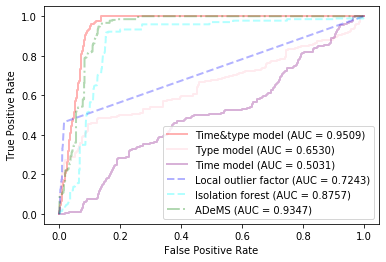

In [12]:
aurocs = eval_AUC(granularity, act_types, empolyeeList, input_path, score_lof, score_iso, score_ADeMS, testing_act_start_point, 'overall', _index=None)

##### AUROC categorized by log_file types.

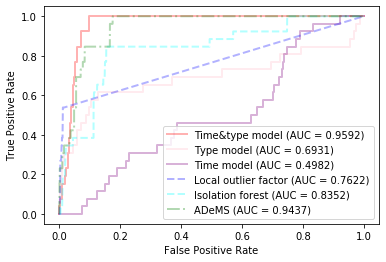

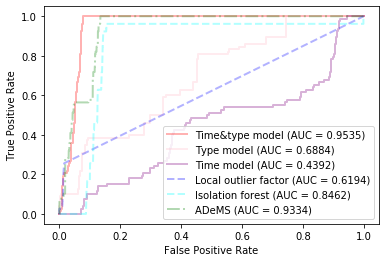

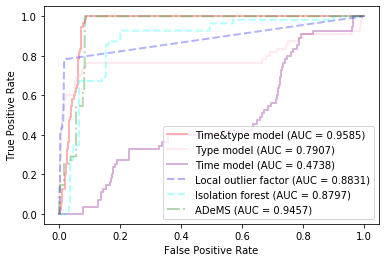

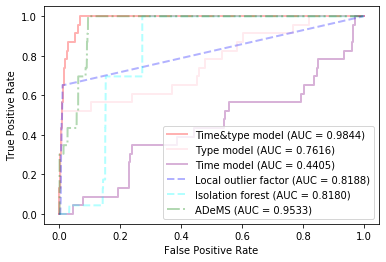

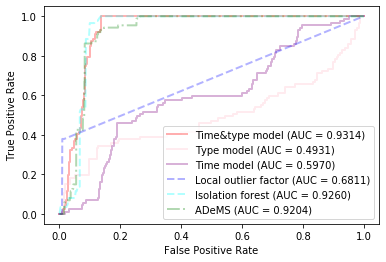

In [13]:
granularity = "log_type"
act_types = [[0,1,2,3,4], [5, 6, 7, 8, 9], [10, 11, 12, 13, 14, 15], [16, 18, 19], [20, 21, 22]]
index = ["logon", "device", "file", "http", "email"]
for _act_type, _index in zip(act_types, index):
#     aurocs = eval_AUC(granularity, act_types, empolyeeList, input_path, score_lof, score_iso, score_Global, score_ADeMS, score_RandADeMS, testing_act_start_point, _index=None)
    aurocs = eval_AUC(granularity, _act_type, empolyeeList, input_path, score_lof, score_iso, score_ADeMS, testing_act_start_point, _index, _index=None)

### 3. evaluate the models by malicious score ranking.

In [22]:
def detection_by_score_ranking(score, _label, _act, _tim, score_type, top_percent, detail):
    
    desc_sort_index = np.argsort(score)
    for n in [int(len(_act)*top_percent)]:
        _dec_sort_label = _label[desc_sort_index][0:n]
        count = 0
        for label in _dec_sort_label:
            if label == 1:
                count += 1
        print(score_type, ": ", "top n=%s   " % n, "#_of_insider_activities=%s "%count)        
        
        if detail:     
            _dec_sort_act = _act[desc_sort_index][0:n].tolist()
            _dec_sort_tim = _tim[desc_sort_index][0:n].tolist()
            _dec_sort_score = score[desc_sort_index][0:n].tolist()
            
            print("(")
            for _type in set(_dec_sort_act):
                count = 0
                for act in _dec_sort_act:
                    if _type == act:
                        count += 1
                print("type=%s" % _type, ": ", count)
            print( ")")
            
            print("[")
            for label, _time, _type, _score in zip(_dec_sort_label, _dec_sort_tim, _dec_sort_act, _dec_sort_score):
                if label == 1:
                    print(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(_time)), _time, id_2_feature[_type], _score)
            print("]")
            print("\n \n \n")

##### User-specific score ranking

In [28]:
def eval_model_by_score_ranking(usrid, start_piont, input_path, top_percent, base_iso=None, base_lof=None, base_adems=None, detail=None):
    
        f_t = np.load("./%s/f_t/%s_f_t.npy"%(input_path,usrid))[start_piont:]
        f_y = np.load("./%s/f_y/%s_f_y.npy"%(input_path,usrid))[start_piont:]
        scores = np.load("./%s/score/%s_score.npy"%(input_path,usrid))[start_piont:]
        _act = np.load("./%s/activity/%s_act.npy"%(input_path,usrid))[start_piont:]
        _label = np.load("./%s/label/%s_act_label.npy"%(input_path,usrid))[start_piont:]
        _tim = np.load("./dataRepo/repo_eval/time/%s_time.npy"%usrid)[start_piont:]

        _label_ignore_WWW_visit = [1 if _lab == 1 and _activity != 17 else 0 for _activity, _lab in zip(_act, _label)]
        _label_ignore_WWW_visit = np.array(_label_ignore_WWW_visit)

        print("&&& %s: total #_of_activities= %s   total #_of_insider_activities = %s"%(usrid, len(_label), len([_lab for _lab in _label_ignore_WWW_visit if _lab == 1])))
        print("============================================================================================")

        detection_by_score_ranking(f_t, _label_ignore_WWW_visit, _act, _tim, "time",top_percent,detail)
        detection_by_score_ranking(f_y, _label_ignore_WWW_visit, _act, _tim, "type",top_percent,detail)
        detection_by_score_ranking(scores, _label_ignore_WWW_visit, _act, _tim, "time&type *",top_percent,detail)
        detection_by_score_ranking(base_iso, _label_ignore_WWW_visit, _act, _tim, "isolation forest",top_percent,detail)
        detection_by_score_ranking(base_lof, _label_ignore_WWW_visit, _act, _tim, "local outlier factor",top_percent,detail)
        detection_by_score_ranking(base_adems, _label_ignore_WWW_visit, _act, _tim, "ADEMS",top_percent,detail)

##### User-\lambda_0 spcecific

In [130]:
def eval_model_by_score_ranking_2(usrid, start_piont, input_path, _lambda_0, base_iso=None, base_lof=None):
    
        f_t = np.load("./%s/f_t/%s_f_t_%s.npy"%(input_path,usrid, _lambda_0))[start_piont:]
        f_y = np.load("./%s/f_y/%s_f_y_%s.npy"%(input_path,usrid, _lambda_0))[start_piont:]
        scores = np.load("./%s/score/%s_score_%s.npy"%(input_path,usrid, _lambda_0))[start_piont:]
        _act = np.load("./%s/activity/%s_act.npy"%(input_path,usrid))[start_piont:]
        _label = np.load("./%s/label/%s_act_label.npy"%(input_path,usrid))[start_piont:]
        _tim = np.load("./dataRepo/repo_eval/time/%s_time.npy"%usrid)[start_piont:]

        _label_ignore_WWW_visit = [1 if _lab == 1 and _activity != 17 else 0 for _activity, _lab in zip(_act, _label)]
        _label_ignore_WWW_visit = np.array(_label_ignore_WWW_visit)

        print("&&& %s: total #_of_activities= %s   total #_of_insider_activities = %s"%(usrid, len(_label), len([_lab for _lab in _label if _lab == 1])))
        print("============================================================================================")

        detection_by_score_ranking(f_t, _label_ignore_WWW_visit, _act, _tim, "time")
        detection_by_score_ranking(f_y, _label_ignore_WWW_visit, _act, _tim, "type")
        detection_by_score_ranking(scores, _label_ignore_WWW_visit, _act, _tim, "time&type *")
        detection_by_score_ranking(base_iso, _label_ignore_WWW_visit, _act, _tim, "isolation forest")
        detection_by_score_ranking(base_lof, _label_ignore_WWW_visit, _act, _tim, "local outlier factor")

##### Load and integrate out the scores.

In [46]:
empolyeeList = ['ACM2278', 'CDE1846', 'CMP2946', 'MBG3183', 'PLJ1771']
testing_act_start_point = [3137,3775,6198,4243, 2096,4501,1494,3760,461, 461]
testing_act_length = [28233,33979,55791,38195,18868,40514,13449,33842,4149,4150]

iso_scores = defaultdict(list)
lof_scores = defaultdict(list)
adems_scores = defaultdict(list)
for i, usrid in enumerate(empolyeeList):
    if i == 0:
        iso_scores[usrid] = score_iso[:testing_act_length[i]]
        lof_scores[usrid] = score_lof[:testing_act_length[i]]
        adems_scores[usrid] = score_ADeMS[:testing_act_length[i]]
    else:
        iso_scores[usrid] = score_iso[np.sum(testing_act_length[:i]):np.sum(testing_act_length[:i+1])]
        lof_scores[usrid] = score_lof[np.sum(testing_act_length[:i]):np.sum(testing_act_length[:i+1])]
        adems_scores[usrid] = score_ADeMS[np.sum(testing_act_length[:i]):np.sum(testing_act_length[:i+1])]

In [49]:
input_path = "eval_input"
top_percent = 0.15
for usrid, _start_piont in zip(empolyeeList, testing_act_start_point):
    eval_model_by_score_ranking(usrid, _start_piont, input_path, top_percent,iso_scores[usrid], lof_scores[usrid], adems_scores[usrid])
    print(" \n ")

&&& ACM2278: total #_of_activities= 28233   total #_of_insider_activities = 22
time :  top n=4234    #_of_insider_activities=0 
type :  top n=4234    #_of_insider_activities=22 
time&type * :  top n=4234    #_of_insider_activities=22 
isolation forest :  top n=4234    #_of_insider_activities=5 
local outlier factor :  top n=4234    #_of_insider_activities=7 
ADEMS :  top n=4234    #_of_insider_activities=22 
 
 
&&& CDE1846: total #_of_activities= 33979   total #_of_insider_activities = 134
time :  top n=5096    #_of_insider_activities=26 
type :  top n=5096    #_of_insider_activities=76 
time&type * :  top n=5096    #_of_insider_activities=134 
isolation forest :  top n=5096    #_of_insider_activities=134 
local outlier factor :  top n=5096    #_of_insider_activities=83 
ADEMS :  top n=5096    #_of_insider_activities=130 
 
 
&&& CMP2946: total #_of_activities= 55791   total #_of_insider_activities = 94
time :  top n=8368    #_of_insider_activities=13 
type :  top n=8368    #_of_insid

In [53]:
input_path = "eval_input"
top_percent = 0.03
for usrid, _start_piont in zip(empolyeeList, testing_act_start_point):
    eval_model_by_score_ranking(usrid, _start_piont, input_path, top_percent, iso_scores[usrid], lof_scores[usrid], adems_scores[usrid], detail=True)
    print(" \n ")

&&& ACM2278: total #_of_activities= 28233   total #_of_insider_activities = 22
time :  top n=846    #_of_insider_activities=0 
(
type=1 :  31
type=4 :  2
type=15 :  2
type=17 :  726
type=19 :  1
type=21 :  49
type=22 :  35
)
[
]

 
 

type :  top n=846    #_of_insider_activities=19 
(
type=1 :  6
type=2 :  4
type=3 :  1
type=4 :  11
type=7 :  8
type=8 :  3
type=9 :  9
type=12 :  5
type=13 :  1
type=14 :  11
type=15 :  36
type=17 :  640
type=18 :  22
type=19 :  41
type=21 :  34
type=22 :  14
)
[
2010-08-19 01:46:04 1282200364.0 File_zip 0.7748023767214106
2010-08-19 01:38:10 1282199890.0 File_txt 0.7811421373585059
2010-08-19 01:34:19 1282199659.0 File_jpg 0.7946731970886692
2010-08-24 03:24:16 1282638256.0 Connect_After 0.8102738567035168
2010-08-24 03:48:51 1282639731.0 File_jpg 0.826916317866252
2010-08-24 03:34:21 1282638861.0 File_txt 0.8300152321707119
2010-08-19 01:37:20 1282199840.0 File_jpg 0.8317830873520561
2010-08-18 21:47:42 1282186062.0 Weekday_Logon_After 0.83750647300684

2011-03-22 18:05:06 1300835106.0 Email_Out -7071067811.865477
2011-03-22 18:03:27 1300835007.0 Email_Out -7071067811.865477
2011-03-22 18:03:22 1300835002.0 Email_Out -7071067811.865477
2011-03-22 18:02:46 1300834966.0 Email_Out -7071067811.865477
2011-03-22 18:01:54 1300834914.0 Email_Out -7071067811.865477
2011-03-22 18:01:49 1300834909.0 Email_Out -7071067811.865477
2011-03-22 18:01:10 1300834870.0 Email_Out -7071067811.865477
2011-03-17 18:34:15 1300404855.0 Weekday_Logon_After -3535533905.9327383
2011-03-29 18:35:59 1301441759.0 Weekday_Logon_After -3535533905.9327383
2011-02-21 11:43:39 1298310219.0 Weekday_Logon_Normal -3535533905.9327383
2011-04-25 17:45:45 1303771545.0 File_doc -707106781.1865476
2011-04-07 17:50:22 1302216622.0 File_doc -707106781.1865476
2011-03-22 17:55:49 1300834549.0 File_doc -707106781.1865476
2011-04-07 17:47:17 1302216437.0 File_doc -707106781.1865476
2011-03-22 17:58:08 1300834688.0 File_doc -707106781.1865476
2011-03-22 17:58:59 1300834739.0 File_doc

&&& PLJ1771: total #_of_activities= 18868   total #_of_insider_activities = 15
time :  top n=566    #_of_insider_activities=0 
(
type=1 :  31
type=2 :  39
type=4 :  57
type=17 :  406
type=19 :  2
type=21 :  21
type=22 :  10
)
[
]

 
 

type :  top n=566    #_of_insider_activities=8 
(
type=1 :  108
type=2 :  73
type=4 :  116
type=6 :  1
type=7 :  1
type=9 :  2
type=11 :  2
type=12 :  4
type=13 :  2
type=14 :  1
type=15 :  13
type=17 :  40
type=18 :  16
type=19 :  33
type=21 :  81
type=22 :  73
)
[
2010-08-12 20:27:13 1281662833.0 Connect_After 0.8035882879740254
2010-08-12 16:14:37 1281647677.0 Disconnect 0.8109090376233263
2010-08-12 16:11:39 1281647499.0 File_exe 0.8183766990422019
2010-08-12 16:07:53 1281647273.0 Connect_Normal 0.8246744702131594
2010-08-12 20:30:19 1281663019.0 Disconnect 0.8345176033912022
2010-08-12 20:29:44 1281662984.0 File_exe 0.8354632048244032
2010-08-12 16:11:39 1281647499.0 WebsiteDownload 0.8892968047951328
2010-08-12 20:31:44 1281663104.0 Logoff 0.932614

### 4. Empirical distribution of the likelihood.

In [723]:
def draw_curve(sus_score, act_type, x_label, bin_num, usrid, int_indicator, y_axis_int=None):
    
    n, bins, patches = plt.hist(sus_score, bin_num, facecolor='g', range=(0.0, 1.0))

    plt.xlabel('%s'%x_label)
    plt.ylabel('Frequency')
    
    if y_axis_int:
        y = np.array(n).astype(int)
        if y_axis_int == 1:
            yint = np.arange(min(y), max(y)+1)
        else:
            yint = np.arange(min(y), max(y)+1, 3)
        plt.yticks(yint)

    plt.show()
    plt.close()

In [724]:
def activity_distribution_analysis(usrid, f_t, f_y, score, label, int_index):

    ins_f_t = f_t[label == 1]
    nor_f_t = f_t[label == 0]


    ins_f_y = f_y[label == 1]
    nor_f_y = f_y[label == 0]


    ins_score = score[label == 1]
    nor_score = score[label == 0]
    

    draw_curve(ins_f_t,"malicious_f_t", "$p^*(t)$",200, usrid, int_index[0])
    draw_curve(nor_f_t,"normal_f_t","$p^*(t)$",200, usrid, int_index[1])

    draw_curve(ins_f_y,"malicious_f_y", "$p^*(y)$", 200, usrid, int_index[2])
    draw_curve(nor_f_y,"normal_f_y", "$p^*(y)$",200, usrid, int_index[3])
    draw_curve(ins_score,"malicious_score", "$p^*(t,y)$",200, usrid, int_index[4], y_axis_int=2)
    draw_curve(nor_score,"normal_score", "$p^*(t,y)$",200, usrid, int_index[5])

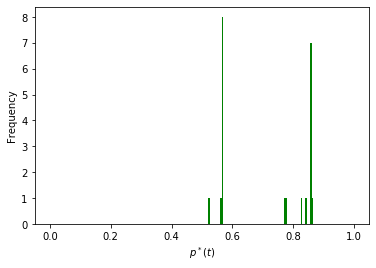

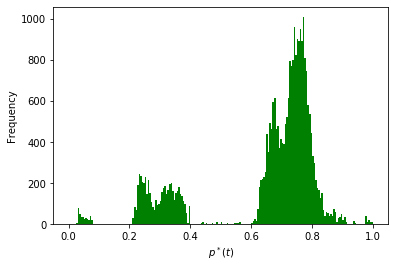

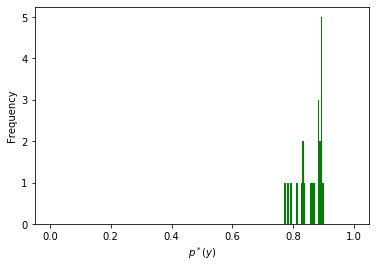

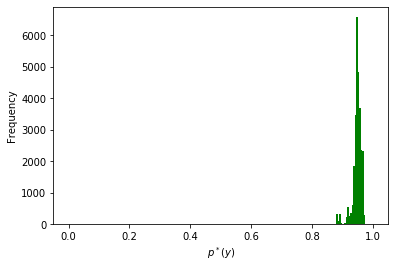

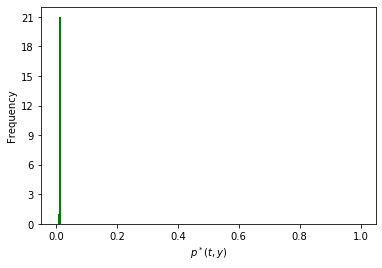

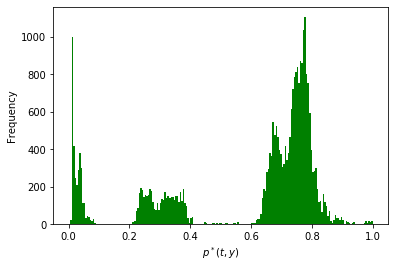

ACM2278


KeyboardInterrupt: 

In [725]:
y_int_index = [1,0,1,0,1,0]
input_path = "eval_input"
start_point = [3137,3775,6198,4243, 2096]
for usr, _start_point in zip(['ACM2278', 'CDE1846', 'CMP2946', 'MBG3183', 'PLJ1771'], start_point):
    f_t = np.load("./%s/f_t/%s_f_t.npy"%(input_path, usr))[_start_point:]
    f_y = np.load("./%s/f_y/%s_f_y.npy"%(input_path, usr))[_start_point:]
    scores = np.load("./%s/score/%s_score.npy"%(input_path, usr))[_start_point:]
    activities = np.load("./%s/activity/%s_act.npy"%(input_path, usr))[_start_point:]
    labels = np.load("./%s/label/%s_act_label.npy"%(input_path, usr))[_start_point:]

    _label_ignore_WWW_visit = [1 if _lab == 1 and _activity != 17 else 0 for _activity, _lab in zip(activities, labels)]
    _label_ignore_WWW_visit = np.array(_label_ignore_WWW_visit)

    activity_distribution_analysis(usr, f_t, f_y, scores, _label_ignore_WWW_visit, y_int_index)
    print(usr)
    input()